In [222]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [74]:
df=pd.read_csv('/Users/laurakim/Desktop/reduced_combined_csv.csv')

In [75]:
df['CreatedDate']= pd.to_datetime(df.CreatedDate)

In [76]:
df1=df.sort_values(by='CreatedDate', ascending=True)

In [77]:
df1

,CreatedDate,RequestSource
3288390,2015-08-05 06:09:44,Email
3282937,2015-08-05 06:21:04,Call
3288391,2015-08-05 06:28:10,Call
3288392,2015-08-05 06:31:03,Call
3288393,2015-08-05 06:34:39,Call
3288394,2015-08-05 06:34:45,Call
3288395,2015-08-05 06:36:27,Call
3288396,2015-08-05 06:36:56,Call
3288397,2015-08-05 06:37:04,Call
3288398,2015-08-05 06:42:57,Email


In [78]:
list=[]
def request_source():
    for x in df1['RequestSource']:
        if (x=='Call'):
            list.append(x)
        elif (x=='Twitter'):
            list.append(x)
        elif (x=='Mobile App'):
            list.append(x)
        else:
            list.append('Other')
    return list         

In [79]:
df1['RequestSource']=request_source()

In [80]:
df1

,CreatedDate,RequestSource
3288390,2015-08-05 06:09:44,Other
3282937,2015-08-05 06:21:04,Call
3288391,2015-08-05 06:28:10,Call
3288392,2015-08-05 06:31:03,Call
3288393,2015-08-05 06:34:39,Call
3288394,2015-08-05 06:34:45,Call
3288395,2015-08-05 06:36:27,Call
3288396,2015-08-05 06:36:56,Call
3288397,2015-08-05 06:37:04,Call
3288398,2015-08-05 06:42:57,Other


In [102]:
len(df1)

4099971

In [81]:
df2=pd.DataFrame(df1.astype(str))
df2['CreatedDate']=df2['CreatedDate'].str.slice(stop=7)

In [82]:
df2.columns=['year_month', 'RequestSource']

In [83]:
df2

,year_month,RequestSource
3288390,2015-08,Other
3282937,2015-08,Call
3288391,2015-08,Call
3288392,2015-08,Call
3288393,2015-08,Call
3288394,2015-08,Call
3288395,2015-08,Call
3288396,2015-08,Call
3288397,2015-08,Call
3288398,2015-08,Other


In [141]:
mm=df2.groupby(['year_month']).count().reset_index()
mm

,year_month,RequestSource
0,2015-08,41277
1,2015-09,57427
2,2015-10,50666
3,2015-11,43368
4,2015-12,44622
5,2016-01,61660
6,2016-02,70485
7,2016-03,79578
8,2016-04,73712
9,2016-05,81445


In [84]:
call_list = df2.loc[df['RequestSource'] == 'Call']

In [148]:
call_list2 = pd.DataFrame(call_list.groupby(['year_month']).count().reset_index())
call_list2.columns=[['year_month', 'total number of call use']]
call_list2

,year_month,total number of call use
0,2015-08,35333
1,2015-09,36704
2,2015-10,35525
3,2015-11,33291
4,2015-12,34571
5,2016-01,36630
6,2016-02,38960
7,2016-03,43531
8,2016-04,40443
9,2016-05,44284


In [164]:
d=[0.855997, 0.6391419, 0.7011605, 0.76764, 0.77475, 0.5941, 0.5527, 0.54702, 0.54866, 0.5437, 0.55473, 0.48716, 0.55669, 0.48291, 0.50168, 0.50485, 0.47842, 0.43602, 0.42962, 0.45253, 0.4696, 0.47125, 0.503066, 0.511434, 0.48616, 0.48178, 0.477236, 0.5000, 0.4445, 0.45663, 0.4447, 0.42747, 0.466998, 0.47784, 0.50233, 0.50506, 0.51984, 0.491184, 0.47456, 0.486611, 0.431456, 0.47433, 0.487496, 0.49827, 0.470465, 0.478867, 0.48832]

In [165]:
call_list2['monthly total request']=mm['RequestSource']
call_list2['time']=np.arange(0,47)
call_list2['calls/month']=d
call_list2

,year_month,total number of call use,monthly total request,time,calls/month
0,2015-08,35333,41277,0,0.855997
1,2015-09,36704,57427,1,0.639142
2,2015-10,35525,50666,2,0.701160
3,2015-11,33291,43368,3,0.767640
4,2015-12,34571,44622,4,0.774750
5,2016-01,36630,61660,5,0.594100
6,2016-02,38960,70485,6,0.552700
7,2016-03,43531,79578,7,0.547020
8,2016-04,40443,73712,8,0.548660
9,2016-05,44284,81445,9,0.543700


In [166]:
app_list = df2.loc[df['RequestSource'] == 'Mobile App']

In [187]:
f=[0.09218, 0.2244, 0.12996, 0.111326, 0.11023, 0.14815, 0.1469, 0.1363567, 0.15645,0.14755,0.1385,0.1279,0.1414,0.14421,0.1596,0.15675,0.14548, 0.16816,0.1691,0.160596,0.1694,0.173955,0.15657,0.1753,0.1633,0.1696,0.16644,0.17701,0.18307,0.1944,0.15896,0.1717,0.1921,0.2008,0.21074,0.2028,0.20599,0.2270,0.2126,0.2203,0.2548,0.2452,0.2509,0.2500,0.2140,0.2423,0.2497]

In [188]:
app_list2 = pd.DataFrame(app_list.groupby(['year_month']).count().reset_index())
app_list2.columns=[['year_month', 'total number of app use']]
app_list2['monthly total request']=mm['RequestSource']
app_list2['time']=np.arange(0,47)
app_list2['app/month']=f
app_list2

,year_month,total number of app use,monthly total request,time,app/month
0,2015-08,3805,41277,0,0.092180
1,2015-09,12887,57427,1,0.224400
2,2015-10,6529,50666,2,0.129960
3,2015-11,4828,43368,3,0.111326
4,2015-12,4919,44622,4,0.110230
5,2016-01,9135,61660,5,0.148150
6,2016-02,10357,70485,6,0.146900
7,2016-03,10851,79578,7,0.136357
8,2016-04,11532,73712,8,0.156450
9,2016-05,12017,81445,9,0.147550


In [171]:
twitter_list = df2.loc[df['RequestSource']=='Twitter']
twitter_list2=pd.DataFrame(twitter_list.groupby(['year_month']).count().reset_index())
twitter_list2.columns=[['year_month', 'total number of twitter use']]

In [191]:
g=[0.05177,0.1364,0.16996,0.1210,0.1150,0.25775,0.3003,0.316544,0.294877,0.3087,0.30677,0.3849,0.30186,0.3728,0.3387,0.33835,0.37608,0.3958,0.4013,0.3868,0.36097,0.354795,0.34033,0.31321,0.3505,0.3486,0.3563,0.32296,0.372397,0.34897,0.3963,0.4008,0.3409,0.3213,0.2869,0.29213,0.27417,0.28176,0.3128,0.29303,0.31368,0.2804,0.2615,0.2516,0.3154,0.278779,0.26187]

In [194]:
others_list = df2.loc[df1['RequestSource']=='Other']
others_list2 = pd.DataFrame(others_list.groupby(['year_month']).count().reset_index())
others_list2.columns =[['year_month', 'total number of Others use']]
others_list2['monthly total request']=mm['RequestSource']
others_list2['time']=np.arange(0,47)
others_list2['others/month']=g
others_list2

,year_month,total number of Others use,monthly total request,time,others/month
0,2015-08,2137,41277,0,0.051770
1,2015-09,7834,57427,1,0.136400
2,2015-10,8611,50666,2,0.169960
3,2015-11,5249,43368,3,0.121000
4,2015-12,5132,44622,4,0.115000
5,2016-01,15893,61660,5,0.257750
6,2016-02,21167,70485,6,0.300300
7,2016-03,25190,79578,7,0.316544
8,2016-04,21736,73712,8,0.294877
9,2016-05,25144,81445,9,0.308700


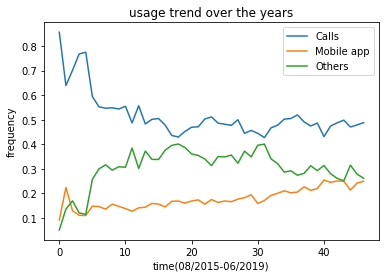

In [195]:
x=np.arange(0,47).reshape(-1,1)
a=call_list2['calls/month'].values.reshape(-1,1)
b=app_list2['app/month'].values.reshape(-1,1)
c=others_list2['others/month'].values.reshape(-1,1)
plt.plot(x,a)
plt.plot(x,b)
plt.plot(x,c)
plt.legend(['Calls','Mobile app','Others'])
plt.title('usage trend over the years')
plt.ylabel('frequency')
plt.xlabel('time(08/2015-06/2019)')
plt.show()

In [207]:
column1=call_list2['calls/month']
column2=app_list2['app/month']
df4=pd.DataFrame(column1.join(column2).reset_index(drop=True))
df4.columns=[['calls', 'apps']]
df4

,calls,apps
0,0.855997,0.092180
1,0.639142,0.224400
2,0.701160,0.129960
3,0.767640,0.111326
4,0.774750,0.110230
5,0.594100,0.148150
6,0.552700,0.146900
7,0.547020,0.136357
8,0.548660,0.156450
9,0.543700,0.147550


In [232]:
from scipy import stats

In [233]:
slope, intercept, r_value, p_value, std_error=stats.linregress(d,f)

In [234]:
r_value**2

0.28470169464842326

In [345]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

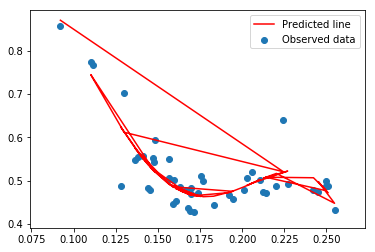

0.7930722878795043


In [346]:
x_train = df4['apps'].values.reshape(-1,1)
y_train = df4['calls'].values.reshape(-1,1)

poly = PolynomialFeatures(degree=4, include_bias=False) #the bias is avoiding the need to intercept
x_new = poly.fit_transform(x_train)
new_model = LinearRegression()
new_model.fit(x_new,y_train)

#plotting
y_prediction = new_model.predict(x_new) #this predicts y
plt.scatter(x_train,y_train)
plt.plot(x_new[:,0], y_prediction, 'r')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

r2=r2_score(y_train,y_prediction)
print(r2)

In [347]:
model.predict(poly.fit_transform([[0.30]]))

array([[-0.46881997]])

0.7930722878795043


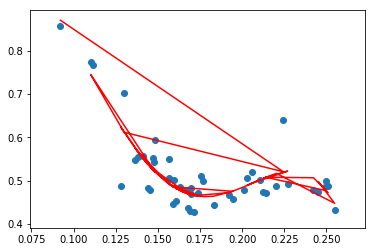

In [348]:
x=df4['apps'].values.reshape(-1,1)
y=df4['calls'].values.reshape(-1,1)

x1=x[:, np.newaxis].reshape(-1,1)
y1=y[:, np.newaxis].reshape(-1,1)

poly=PolynomialFeatures(degree=4, include_bias=False)
x_poly=poly.fit_transform(x1)

model=LinearRegression()
model.fit(x_poly, y1)
y_poly_pred = model.predict(x_poly)
r2=r2_score(y1,y_poly_pred)
print(r2)

plt.scatter(x,y)
plt.plot(x1, y_poly_pred, 'r')


In [349]:
model.predict(poly.fit_transform([[0.30]]))

array([[-0.46881997]])

In [342]:
#if it gives you an error:expected 2d array, you need two square brackets: [[ "x value of your choice"]]

In [122]:
df3=df2.groupby('year_month').count().reset_index()
df3

,year_month,RequestSource
0,2015-08,41277
1,2015-09,57427
2,2015-10,50666
3,2015-11,43368
4,2015-12,44622
5,2016-01,61660
6,2016-02,70485
7,2016-03,79578
8,2016-04,73712
9,2016-05,81445


In [ ]:
df3['year_month'].corr(df3['RequestSource'])

In [253]:
t=np.arange(0,47)

In [254]:
slope, intercept, r_value, p_value, std_error=stats.linregress(t,df3['RequestSource'])

In [255]:
r_value**2

0.5231699772917622

0.7436563744813671


Text(0.5, 1.0, '311 use over time')

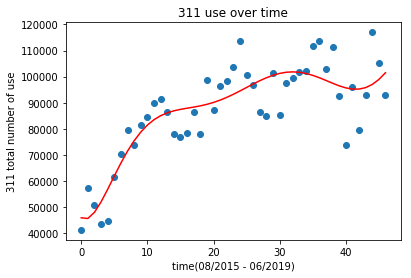

In [399]:
a=np.arange(0,47).reshape(-1,1)
b=df3['RequestSource'].values.reshape(-1,1)

a1=a[:, np.newaxis].reshape(-1,1)
b1=b[:, np.newaxis].reshape(-1,1)

polynomial=PolynomialFeatures(degree=7, include_bias=False)
a_poly=polynomial.fit_transform(a1)

model1=LinearRegression()
model1.fit(a_poly, b1)
b_poly_pred = model1.predict(a_poly)

r2=r2_score(b1,b_poly_pred)
print(r2)

plt.scatter(a,b)
plt.plot(a1, b_poly_pred, 'r')


plt.xlabel('time(08/2015 - 06/2019)')
plt.ylabel('311 total number of use')
plt.title('311 use over time')

In [401]:
#47=June of 2019.  This is by monthly. 
#50=September 2019. 
model1.predict(polynomial.fit_transform([[50]]))

array([[115443.1487649]])

0.825115594694203


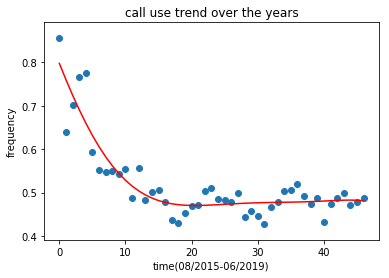

In [426]:
xaxis=np.arange(0,47).reshape(-1,1)
yaxis=call_list2['calls/month'].values.reshape(-1,1)

xaxis1=xaxis[:, np.newaxis].reshape(-1,1)
yaxis1=yaxis[:, np.newaxis].reshape(-1,1)

polynomial_feature=PolynomialFeatures(degree=6, include_bias=False)
xaxis_poly=polynomial_feature.fit_transform(xaxis1)

model1=LinearRegression()
model1.fit(xaxis_poly, yaxis1)
yaxis_poly_pred=model1.predict(xaxis_poly)

r2=r2_score(yaxis1, yaxis_poly_pred)
print(r2)

plt.scatter(xaxis, yaxis)
plt.plot(xaxis1, yaxis_poly_pred, 'r')

plt.title('call use trend over the years')
plt.ylabel('frequency')
plt.xlabel('time(08/2015-06/2019)')
plt.show()

In [1]:
model1.predict(polynomial_feature.fit_transform([[50]]))
#predict call frequency for September 2019

NameError: name 'model1' is not defined